In [1]:
library(tidyverse)
library(ggplot2)
library(plyr)
library(ggrepel)
library(ggepi)
library(dummies)
library(DiscriMiner)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summ

In [2]:
data_dir = './data/'
#today = dt.date.today()

In [3]:
metabolomics_data_scaled = read_csv(paste(data_dir, 'autoscaled_lung_for_pca_2020-06-23.csv', sep =''), col_names = TRUE) %>% as_tibble()
#sample_types = ['Normal', '4 Hr Sham', '4 Hr AKI', '24 Hr Sham', '24 Hr AKI', '7 Day Sham', '7 Day AKI']

Parsed with column specification:
cols(
  .default = col_double(),
  Label = col_character()
)

See spec(...) for full column specifications.



In [4]:
head(metabolomics_data_scaled)

Label,Alanine,Arginine,Asparagine,Aspartate,Cysteine,Glutamate,Glutamine,Glycine,Histidine,⋯,Catechin,D-Ribitol 5-phosphate,Succinyl sulfathiazole,Thioredoxin disulfide,Pyridoxamine,N-Amidino-L-aspartate,Hydroxyacetone phosphate,trans-Homoaconitate,N-Carbamyl-L-glutamate,2-Oxo-7-methylthioheptanoic acid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Normal,-0.3364998,-0.429141664,-1.0330094,0.003940523,-0.7734878,0.06401592,-0.81674633,-0.2617696,-0.6014984,⋯,-0.97546346,0.24938736,0.6730003,1.52658936,-0.2128951,-0.78819929,-0.68983464,-0.1655744,-0.8257752,0.1587865
Normal,0.2294501,-0.385544214,-0.6558702,-0.158761440,-0.9724790,-0.46855828,-0.58414055,-0.8131675,-0.2330162,⋯,-0.05484041,0.07882953,-0.4183617,-0.31144522,1.1039723,-0.24234398,-0.80953994,0.5649637,-1.4671586,0.5422704
Normal,-0.1532610,-0.368201612,-0.9824832,-0.056674849,-0.8507613,0.05536393,-0.84714433,-0.6109272,-0.8702195,⋯,0.22332963,0.21537426,-0.4432881,0.56244011,0.1435986,-0.90742394,-0.65075205,-1.1019196,-1.1821570,0.6565207
Normal,1.0286445,-0.009323397,0.0261742,0.372621188,0.5537390,1.03691325,-0.01312443,0.7768077,0.4576913,⋯,0.10924981,1.23947572,0.6593320,0.53696679,0.7865896,-0.29852390,0.08753756,0.7948587,-0.2546143,1.2047858
Normal,-0.8747091,-0.442199685,-1.2072606,-0.672211165,-0.9983220,-0.66641821,-1.15041751,-0.8198378,-1.0378608,⋯,-0.69538672,-0.78651349,-1.0594586,-0.24923546,-0.4790730,-0.72215198,-0.81909885,-0.7348893,-0.9276107,-0.2952449
Normal,2.0241812,1.513968385,0.3992788,2.170161928,1.0220172,2.26468196,0.57023822,1.6415140,0.8708155,⋯,0.93062805,2.10198375,1.4912791,-0.05080693,-0.4023635,-0.04622649,1.85055253,1.8161449,1.0536270,-0.6668864


In [5]:
organ_name <- 'Lung'

# change labels columns into factor
group_order = c('Normal', '4 Hr Sham', '4 Hr AKI', '24 Hr Sham', '24 Hr AKI', '7 Day Sham', '7 Day AKI') # order
factor_labels <- function(data_frame) {
    data_frame$Label = factor(data_frame$Label, levels = group_order, ordered = T)
    return (data_frame[order(data_frame$Label),])
}

metabolomics_data_scaled = factor_labels(metabolomics_data_scaled)

In [6]:
y = dummy(metabolomics_data_scaled$Label, sep='_')
colnames(y) <- gsub("NA_", "", fixed = TRUE, colnames(y))

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [7]:
head(y)

Normal,4 Hr Sham,4 Hr AKI,24 Hr Sham,24 Hr AKI,7 Day Sham,7 Day AKI
1,0,0,0,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0


In [8]:
pls = plsDA(variables = metabolomics_data_scaled[-(which(colnames(metabolomics_data_scaled) %in% c('Label')))], 
            group = metabolomics_data_scaled$Label, autosel = TRUE, cv = 'LKO', k = 7)

In [9]:
comps = c(1,2)
#comps = c('t1','t2')
comp_names = c('PLS_component_1', 'PLS_component_2')

data_vars = as.data.frame(pls$comp_vars[,comps])
data_vars$Variables <- rownames(data_vars)
rownames(data_vars) <- NULL
colnames(data_vars) <- c(comp_names, 'variables')

data_groups = as.data.frame(pls$comp_group[,comps])
data_groups$Variables <- rownames(data_groups)
rownames(data_groups) <- NULL
colnames(data_groups) <- c(comp_names, 'variables')

final_data <- rbind(data_vars, data_groups)

top = 25
#vips = as.data.frame(pls$VIP[,comps])
#vips$sum_vips = rowSums(vips[,comps])
#top_mets = rownames(vips[order(vips[,'sum_vips'], decreasing = T),][1:top,])
#top_mets = rownames(pls$VIP[order(pls$VIP[,'Model VIP'], decreasing = T),][1:top,])
top_mets = rownames(pls$VIP[which(pls$VIP[,c('Model VIP')] >= 1.0),])
final_data = final_data[final_data$variables %in% c(top_mets, group_order),]

final_data$color_groups <- NULL

final_data$color_groups[final_data$variables %in% group_order] <- 'blue'
final_data$color_groups[final_data$variables %in% top_mets] <- 'dark red'

In [ ]:
#final_data$hjust = with(final_data, (1 - 1.5 * sign(component_1)) / 2)

In [10]:
observations = as.data.frame(pls$components)
observations['sample_group'] = metabolomics_data_scaled$Label

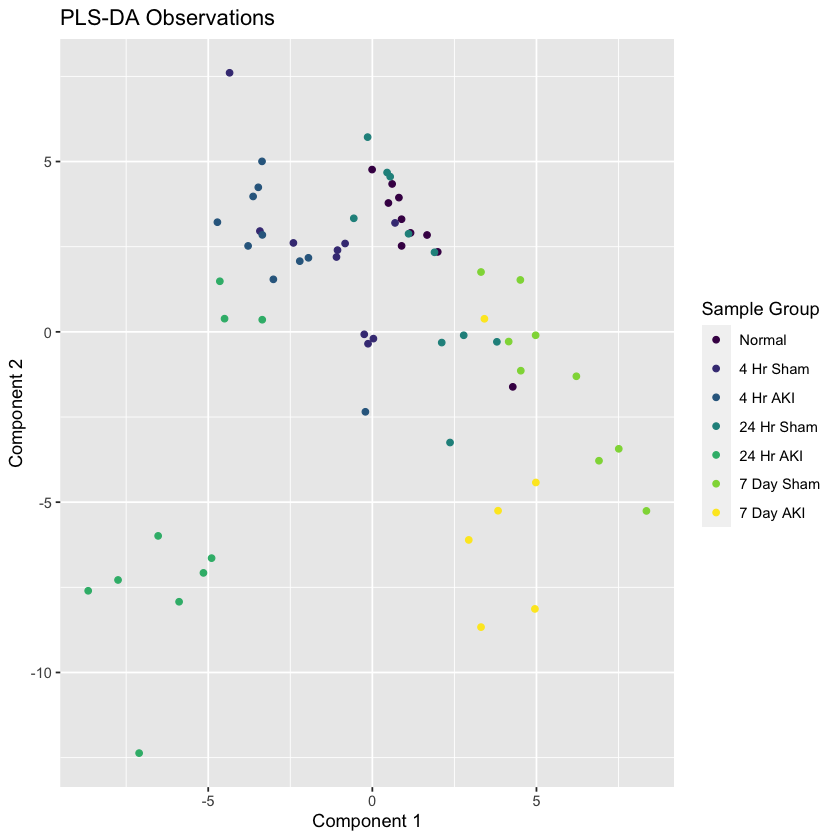

In [11]:
g <- ggplot(observations, aes(x=t1, y=t2, color = sample_group)) + geom_point() + 
     ggtitle('PLS-DA Observations') + xlab('Component 1') + ylab('Component 2') + labs(color='Sample Group') 

#ggsave(plot = g, device = 'png', filename = paste('./', organ_name, '_plsda_obs_comp1_comp2', '.png', sep = '')) # uncomment to save graphs to current wd
g

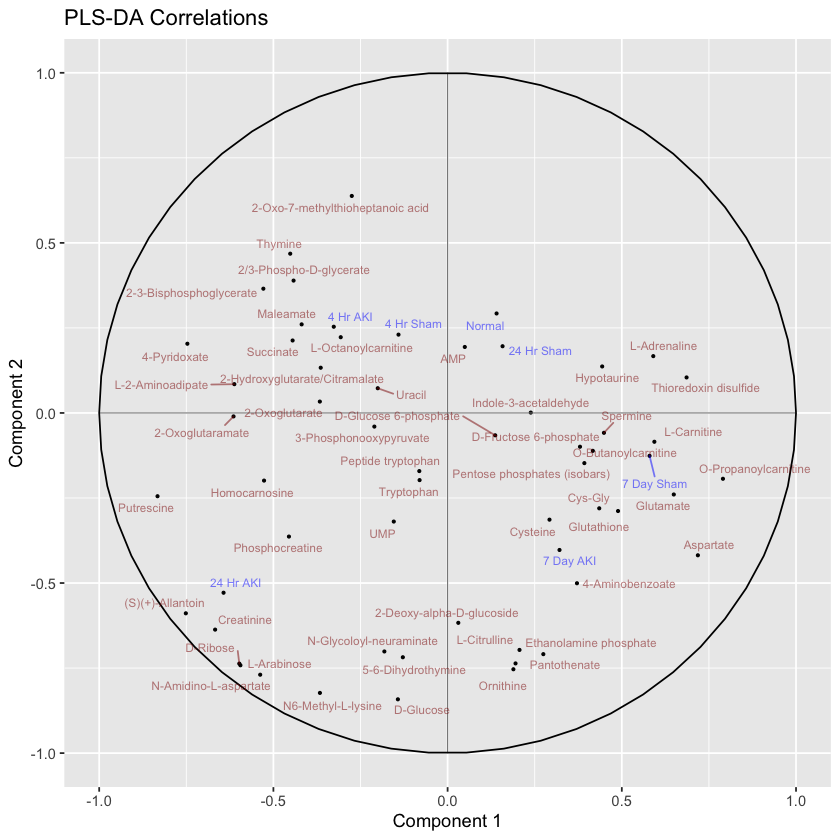

In [12]:
p <- ggplot(data=final_data, aes(x = PLS_component_1, y = PLS_component_2)) + 
     xlim(-1.0,1.0) + ylim(-1.0,1.0) + xlab('Component 1') + ylab('Component 2') +
     ggtitle('PLS-DA Correlations') +
     geom_corr_circle(inner.linesize = 0) + 
     geom_text_repel(data = final_data, alpha = 0.5,
              aes(label = variables, x = PLS_component_1, y = PLS_component_2, angle = 0),
                   color = final_data$color_groups, size = 2.5, force = 1)
#                    nudge_x = 0.01, segment.size = .2,
#                    box.padding = .2, point.padding = 1)
#                      #    size = labels.size) #+ scale_shape_manual(values=c(0,1,2,3,4,5,6)) + scale_color_brewer(palette="Set1")#, labels = Variables)

#ggsave(plot = p, device = 'png', filename = paste('./', organ_name, '_plsda_corrs_comp1_comp2', '.png', sep = '')) # uncomment to save graphs to current wd

p